In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')

from TS_model.vizualization import PerformEDA
from TS_model.feature_engeneering import FeatureEngineer

%load_ext autoreload
%autoreload 2

In [6]:
data = pd.read_excel('../Project 2_2023.xlsx', parse_dates=True, index_col=0)
data.columns = data.columns.str.lower()
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,income,outcome,balance
0,2017-01-09,1.343028,1.487865,-0.144836
1,2017-01-10,1.068610,1.194182,-0.125572
2,2017-01-11,0.944429,0.936663,0.007767
3,2017-01-12,1.672202,0.875379,0.796823
4,2017-01-13,0.955924,0.975645,-0.019721


In [7]:
# # пересчет баланса 
# data['balance'] = data['income'] - data['outcome']
# data.to_excel('../Project 2_2023.xlsx')

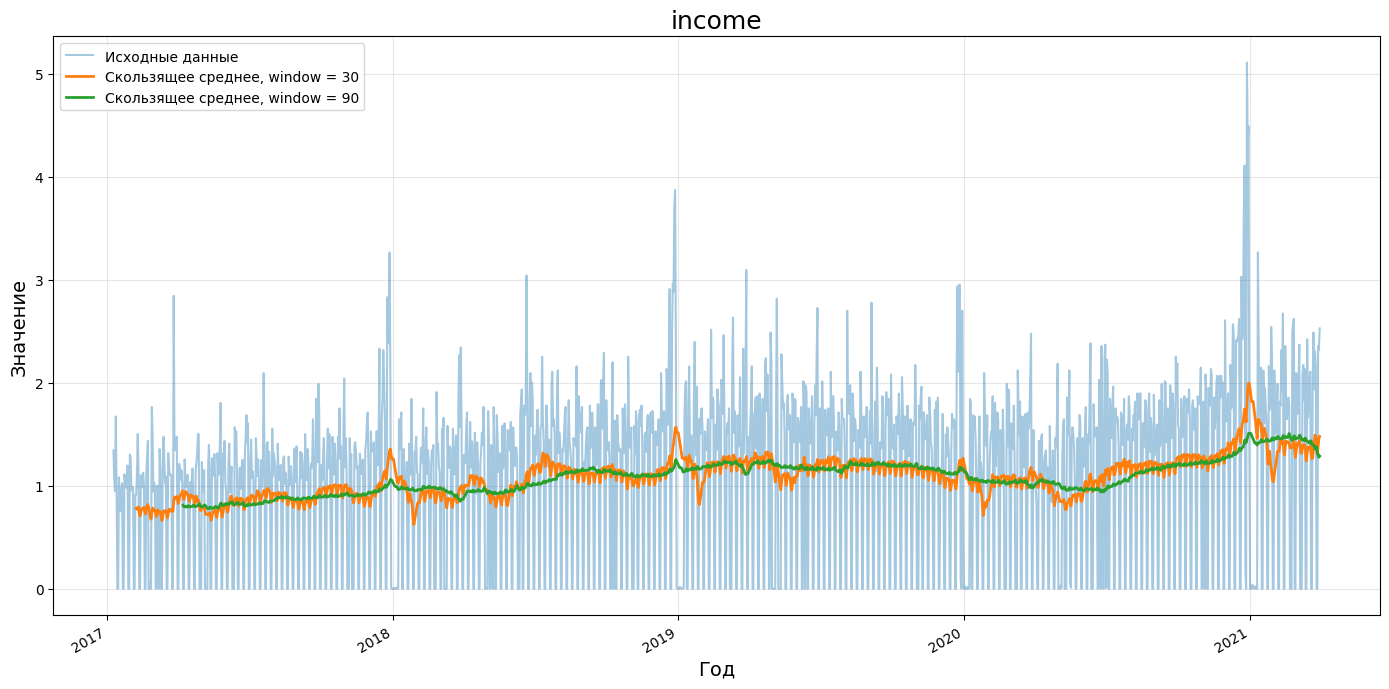

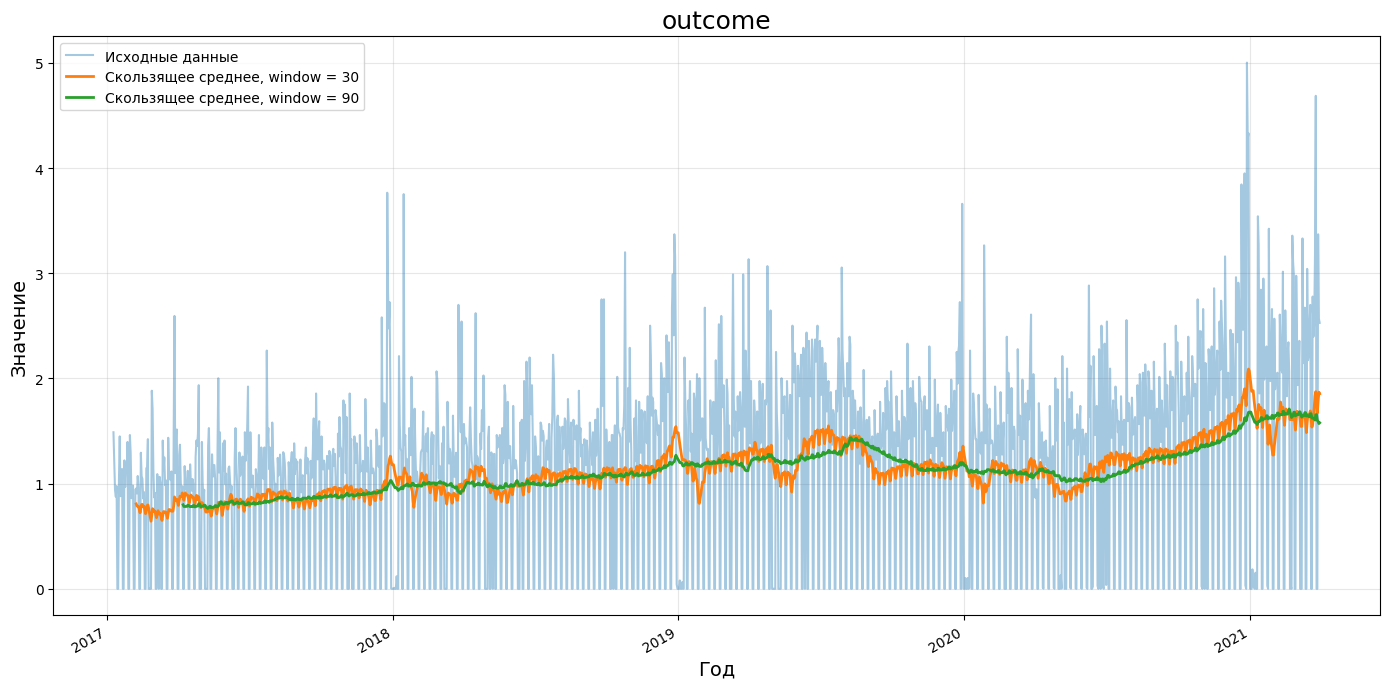

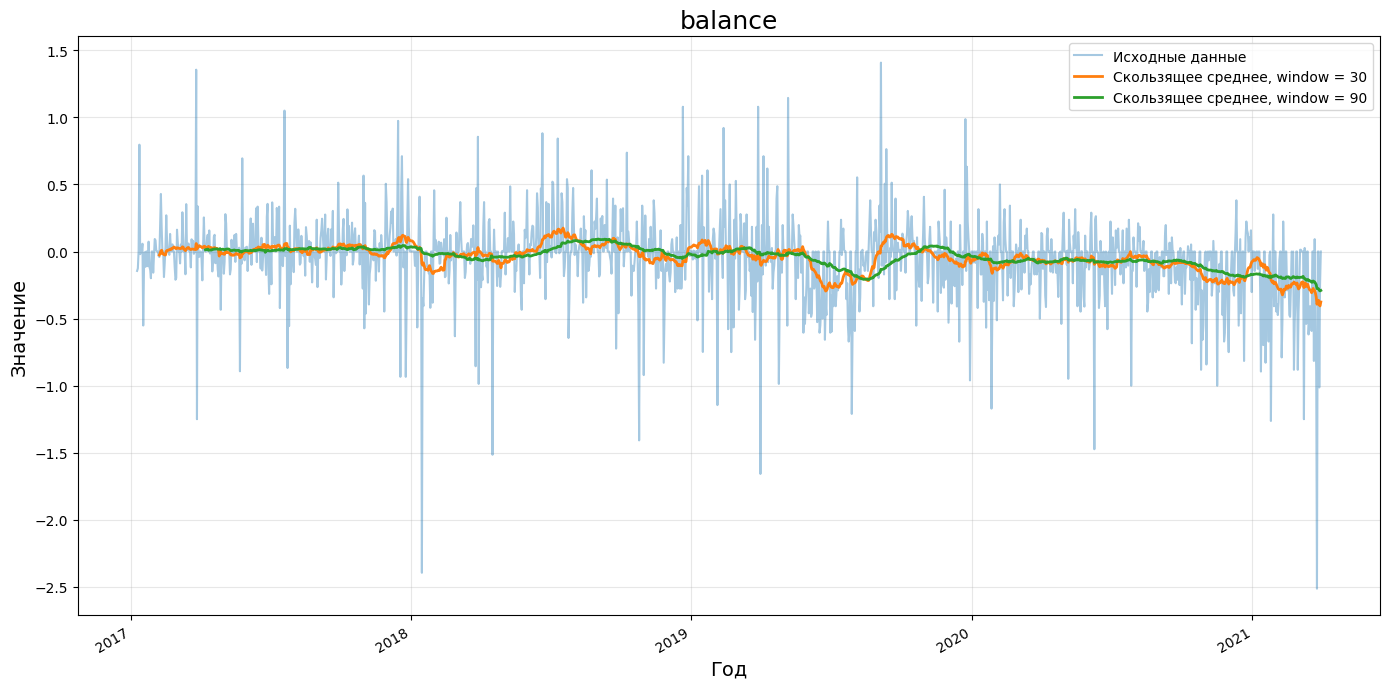

In [8]:
for col in data.copy().drop(['date'], axis=1).columns:
    PerformEDA(data=data).vizualize_var(col, windows=[30, 90])

In [9]:
feature_extactor = FeatureEngineer(data)

In [10]:
feature_extactor.add_lag_features(lags=[1, 2, 3, 7, 30, 60])
feature_extactor.add_rolling_features(windows=[3, 7, 30])
feature_extactor.add_seasonal_features()
# feature_extactor.add_special_dates() ТУТ НАДО ПЕРЕДАТЬ ДАТЫ НАЛОГОВОГО КАЛЕНДАРЯ В ФОРМАТЕ КОТОРЫЙ ЗАШИТ В МЕТОДЕ ИЛИ ПОМЕНЯТЬ МЕТОД
# add_macro_features() ДАТАФРЕЙМ МАКРО ФИЧЕЙ
data_more = feature_extactor.get_feature_df()

In [11]:
data_more.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1483 entries, 2017-03-10 to 2021-03-31
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   balance_lag1     1483 non-null   float64
 1   income_lag1      1483 non-null   float64
 2   outcome_lag1     1483 non-null   float64
 3   balance_lag2     1483 non-null   float64
 4   income_lag2      1483 non-null   float64
 5   outcome_lag2     1483 non-null   float64
 6   balance_lag3     1483 non-null   float64
 7   income_lag3      1483 non-null   float64
 8   outcome_lag3     1483 non-null   float64
 9   balance_lag7     1483 non-null   float64
 10  income_lag7      1483 non-null   float64
 11  outcome_lag7     1483 non-null   float64
 12  balance_lag30    1483 non-null   float64
 13  income_lag30     1483 non-null   float64
 14  outcome_lag30    1483 non-null   float64
 15  balance_lag60    1483 non-null   float64
 16  income_lag60     1483 non-null   float64
 